In [1]:
#import urllib2 as ul
from BadukCorpus import *
from gensim.models import Word2Vec
import ripser
#import homology, timeseries, multidim
from konlpy.tag import Kkma, Mecab, Okt
from konlpy.utils import pprint

In [2]:
db = LoadDB_2020()
kkma = Kkma()
mecab = Mecab()
okt = Okt()
db[:15]

['박영훈 二단 1승 추가! 2:1로 앞서며 타이틀 눈앞!',
 '단신',
 '홍보팀  2001 12 01 오전 00:00    프린트｜스크랩',
 '박영훈 二단이 박카스배 천원전 결승 5번기 제3국에서 윤성현 七단에게 210수 만에 백으로 불계승을 거두며, 2대 1로 앞서 생애 첫 타이틀 획득에 한발짝 더 다가섰습니다.',
 '11월 30일 한국기원 특별 대국실에서 벌어진 이날 대국에서 두 기사는 모두 생애 첫 타이틀에 도전하는 만큼 초반부터 장고전에 들어갔으며 초읽기와 대마싸움 끝에 백이 성공하며 불계승을 거뒀습니다.',
 '생애 첫 타이틀 획득에 1승을 남겨 놓은 박영훈 二단과 윤성현 七단의 반격이 예상되는 제4국은 12월 11일 같은 장소에서 벌어질 예정입니다.',
 '연구생 출신의 홍만기, 아마국수 등극!',
 '세계대회아마선수권대회 출전하여 우승시 입단 가능성 높아',
 '제39회 전국아마국수전',
 '김경동  2005 12 05 오전 10:59    프린트｜스크랩',
 '동아일보 주최로 12월3,4일 양일간 한국기원 대회장에서 벌어진 제39회 전국아마국수전에서 한국기원 연구생 출신의 홍만기 4단 87년생 이 조광희씨 86년생 를 꺾고 우승을 차지했다.     이번 아마 국수전에는 총105명이 출전하여 치열한 예선전을 거쳐 총32명이 본선 토너먼트에 올랐다. 본선 준결승전에서 홍4단이 제3회 오성과 한음배 전국바둑대회 우승자인 우동하 6단을 꺾고 결승에 진출했으며, 조씨 역시 연구생 출신의 윤춘호 6단을 꺾고 결승에 진출했다.     결승전에서 홍4단이 조광희 86년생 에게 242수만에 백불계승을 거두며 대망의 아마국수 우승컵을 차지했다 사진은 우승후 홍4단 좌 이 이레도장 윤명회 원장과 함께 . 이번에 전국대회 첫 우승을 차지한 홍4단은 현재 양건 7단, 안달훈 6단의 문하에서 바둑공부를 하고 있는 중.    이번 대회 우승, 준우승자는 모두 연구생 출신으로 홍씨는 한국기원 공인 아마 4단증을 가지고 있으며 준우승자인 조씨는 아마추어 공인단증이 없

In [10]:
%time db_kkma = [kkma.pos(i) for i in db[:5000]]
%time db_okt = [okt.pos(i) for i in db[:5000]]
%time db_mecab = [mecab.pos(i) for i in db[:5000]]

CPU times: user 5min 55s, sys: 2.25 s, total: 5min 58s
Wall time: 2min 31s
CPU times: user 1min, sys: 357 ms, total: 1min 1s
Wall time: 20.2 s
CPU times: user 715 ms, sys: 8.03 ms, total: 723 ms
Wall time: 722 ms


In [3]:
%time db_mecab = [mecab.pos(i) for i in db]
db_pos = []
for j in db_mecab:
    db_pos.append([k[0] for k in j if (len(j)>1 and k[1][0]!='S')])
db_pos = [i for i in db_pos if len(i)>0]
db_pos

CPU times: user 1min 28s, sys: 1.03 s, total: 1min 29s
Wall time: 1min 29s


[['박영훈', '단', '승', '추가', '로', '앞서', '며', '타이틀', '눈앞'],
 ['홍보', '팀', '오전', '프린트', '스크랩'],
 ['박영훈',
  '단',
  '이',
  '박카스배',
  '천원전',
  '결승',
  '번',
  '기',
  '제',
  '국',
  '에서',
  '윤성현',
  '단',
  '에게',
  '수',
  '만',
  '에',
  '백',
  '으로',
  '불계승',
  '을',
  '거두',
  '며',
  '대',
  '로',
  '앞서',
  '생애',
  '첫',
  '타이틀',
  '획득',
  '에',
  '한',
  '발짝',
  '더',
  '다가섰',
  '습니다'],
 ['월',
  '일',
  '한',
  '국기원',
  '특별',
  '대',
  '국실',
  '에서',
  '벌어진',
  '이날',
  '대국',
  '에서',
  '두',
  '기사',
  '는',
  '모두',
  '생애',
  '첫',
  '타이틀',
  '에',
  '도전',
  '하',
  '는',
  '만큼',
  '초반',
  '부터',
  '장',
  '고전',
  '에',
  '들어갔',
  '으며',
  '초읽기',
  '와',
  '대마',
  '싸움',
  '끝',
  '에',
  '백',
  '이',
  '성공',
  '하',
  '며',
  '불계승',
  '을',
  '거뒀',
  '습니다'],
 ['생애',
  '첫',
  '타이틀',
  '획득',
  '에',
  '승',
  '을',
  '남겨',
  '놓',
  '은',
  '박영훈',
  '단과',
  '윤성현',
  '단의',
  '반격',
  '이',
  '예상',
  '되',
  '는',
  '제',
  '국',
  '은',
  '월',
  '일',
  '같',
  '은',
  '장소',
  '에서',
  '벌어질',
  '예정',
  '입니다'],
 ['연구생', '출신', '의', '홍만기', '아마', '국수',

In [4]:
%time model = Word2Vec(db_pos, size=50, window=5, min_count=1, workers=4)


CPU times: user 1min 57s, sys: 544 ms, total: 1min 58s
Wall time: 52.2 s


In [7]:
model.wv.vocab

{'박영훈': <gensim.models.keyedvectors.Vocab at 0x7f00042de070>,
 '단': <gensim.models.keyedvectors.Vocab at 0x7f00042e5340>,
 '승': <gensim.models.keyedvectors.Vocab at 0x7effc4d46df0>,
 '추가': <gensim.models.keyedvectors.Vocab at 0x7effc4d46b20>,
 '로': <gensim.models.keyedvectors.Vocab at 0x7effc4d46a00>,
 '앞서': <gensim.models.keyedvectors.Vocab at 0x7f00042db130>,
 '며': <gensim.models.keyedvectors.Vocab at 0x7efe7ffac040>,
 '타이틀': <gensim.models.keyedvectors.Vocab at 0x7efe7ffac0a0>,
 '눈앞': <gensim.models.keyedvectors.Vocab at 0x7efe7ffac100>,
 '홍보': <gensim.models.keyedvectors.Vocab at 0x7efe7ffac160>,
 '팀': <gensim.models.keyedvectors.Vocab at 0x7efe7ffac1c0>,
 '오전': <gensim.models.keyedvectors.Vocab at 0x7efe7ffac220>,
 '프린트': <gensim.models.keyedvectors.Vocab at 0x7efe7ffac280>,
 '스크랩': <gensim.models.keyedvectors.Vocab at 0x7efe7ffac2e0>,
 '이': <gensim.models.keyedvectors.Vocab at 0x7efe7ffac340>,
 '박카스배': <gensim.models.keyedvectors.Vocab at 0x7efe7ffac3a0>,
 '천원전': <gensim.models.k

In [16]:
w2c = dict()
for item in model.wv.vocab:
    w2c[item]=model.wv.vocab[item].count
    
w2cSorted=dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))

In [17]:
w2cSorted

{'이': 390766,
 '다': 381946,
 '을': 293005,
 '는': 271104,
 '은': 236118,
 '의': 218607,
 '에': 197095,
 '하': 169156,
 '를': 157272,
 '고': 152502,
 '가': 136376,
 '에서': 133668,
 '단': 133435,
 '한': 129294,
 '바둑': 120074,
 '있': 106114,
 '로': 96031,
 '했': 82706,
 '으로': 80036,
 '도': 76319,
 '들': 66745,
 '일': 65760,
 '었': 61655,
 '기': 57235,
 '수': 57032,
 '과': 56027,
 '것': 54352,
 '게': 52265,
 '지': 48717,
 '한국': 48169,
 '만': 45390,
 '팀': 45014,
 '배': 44235,
 '우승': 42000,
 '대국': 41114,
 '제': 41023,
 '며': 40501,
 '대회': 40093,
 '중국': 38445,
 '위': 38393,
 '년': 38343,
 '기사': 38218,
 '월': 38093,
 '와': 36489,
 '해': 36029,
 '국': 35119,
 '승': 34774,
 '선수': 34262,
 '전': 33146,
 '어': 33070,
 '백': 32946,
 '회': 31656,
 '인': 30524,
 '에게': 30372,
 '명': 30115,
 '이세돌': 29822,
 '흑': 29374,
 '않': 29324,
 '리그': 28926,
 '되': 28610,
 '한다': 28397,
 '까지': 28147,
 '원': 27997,
 '던': 27695,
 '았': 27484,
 '할': 27403,
 '두': 26488,
 '지만': 26449,
 '적': 26175,
 '패': 25439,
 '번': 25163,
 '시': 24307,
 '없': 24042,
 '부터': 23066,
 '면'

In [29]:
cnt = 0
for i in w2cSorted.keys():
    print(i)
    vc = model.wv.vocab[i]
    print(vc.index)
    print(model.wv.get_vector(i))
    cnt +=1
    if cnt>10:
        break

이
0
[ 1.1088479  -1.0681838  -1.2879328   0.85681957  2.2295005  -1.7919554
 -1.6407673   1.539717    3.4973361  -2.8188412  -4.449792   -2.4392247
  2.4522913  -1.1039605   0.65627295 -1.7570376   0.93196726  0.69134337
  0.18637653  0.426977   -1.5131056  -0.09857497  2.3372922   1.7997788
 -0.11674096 -1.3232911  -0.8145612   0.2686778  -0.01373574  1.5444602
  1.1486053   0.4638543  -0.03336035  0.05089118  1.4713411  -0.7325542
  0.33918792 -1.9780065   0.9054685  -0.658382   -2.2108946   1.3040867
  1.1575825   1.5527982  -0.64296246  1.0229495   2.287378    1.3220208
  1.11007     0.5360768 ]
다
1
[-0.15030402 -2.9080384  -2.0097892   1.0918037  -1.5620806  -1.1383301
  2.3985174  -1.4691625   1.4043587  -0.47080874  1.6308528  -1.87968
  0.36482033  0.7188966   1.8723358  -2.0602965  -2.1917655  -3.902528
  3.3383925   0.16849013 -4.783385   -0.65237635  1.9415783   0.7869128
 -2.641187   -1.4654512  -2.8435433   2.1810553  -0.34984323  0.77001166
 -2.0000274   4.6384373  -0.039

In [30]:
model.wv.vectors[:10]

array([[ 1.10884786e+00, -1.06818378e+00, -1.28793275e+00,
         8.56819570e-01,  2.22950053e+00, -1.79195535e+00,
        -1.64076734e+00,  1.53971696e+00,  3.49733615e+00,
        -2.81884122e+00, -4.44979191e+00, -2.43922472e+00,
         2.45229125e+00, -1.10396051e+00,  6.56272948e-01,
        -1.75703764e+00,  9.31967258e-01,  6.91343367e-01,
         1.86376527e-01,  4.26977009e-01, -1.51310563e+00,
        -9.85749736e-02,  2.33729219e+00,  1.79977882e+00,
        -1.16740957e-01, -1.32329106e+00, -8.14561188e-01,
         2.68677801e-01, -1.37357414e-02,  1.54446018e+00,
         1.14860535e+00,  4.63854313e-01, -3.33603472e-02,
         5.08911796e-02,  1.47134113e+00, -7.32554197e-01,
         3.39187920e-01, -1.97800648e+00,  9.05468524e-01,
        -6.58381999e-01, -2.21089458e+00,  1.30408669e+00,
         1.15758252e+00,  1.55279815e+00, -6.42962456e-01,
         1.02294946e+00,  2.28737807e+00,  1.32202077e+00,
         1.11006999e+00,  5.36076784e-01],
       [-1.50

In [22]:
%time pc = multidim.PointCloud(model.wv.vectors.astype('float64'), max_length=-1.0)

NameError: name 'multidim' is not defined

In [5]:
%time rpc = ripser.ripser(model.wv.vectors[:10000])

CPU times: user 3min 8s, sys: 7.31 s, total: 3min 15s
Wall time: 3min 9s


In [9]:
wv = model.wv
del model
%time rpc = ripser.ripser(wv.vectors[:20000])

CPU times: user 36min 13s, sys: 25.2 s, total: 36min 39s
Wall time: 36min 20s


In [ ]:
%time rpc = ripser.ripser(model.wv.vectors[:30000])

In [43]:
%time pc.make_pers0()

CPU times: user 35.1 s, sys: 88 ms, total: 35.2 s
Wall time: 34.1 s


In [ ]:
%time pc.make_pers1_rca1()

In [6]:
from gensim.test.utils import common_texts, get_tmpfile

#path = get_tmpfile("gensim_w2v_oro.model")

model.save("gensim_w2v_oro.model")


In [7]:
import pickle

In [8]:
with open('gensim_rpc_oro.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump(rpc, f)


In [20]:
tooltip_s = []
cnt = 0
for i in w2cSorted.keys():
    if cnt<10000:
        tooltip_s.append(i)
    cnt+=1
tooltip_s = np.array(tooltip_s)

In [21]:
len(tooltip_s)

10000

KeplerMapper()
..Composing projection pipeline of length 1:
	Projections: sum
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (10000, 50)

..Projecting data using: sum

..Scaling with: MinMaxScaler()

Mapping on data shaped (10000, 50) using lens shaped (10000, 1)

Minimal points in hypercube before clustering: 2
Creating 26 hypercubes.
   > Found 0 clusters.

   > Found 0 clusters.

   > Found 0 clusters.

   > Found 0 clusters.

   > Found 0 clusters.

   > Found 0 clusters.

   > Found 0 clusters.

   > Found 1 clusters.

   > Found 5 clusters.

   > Found 9 clusters.

   > Found 13 clusters.

   > Found 16 clusters.

   > Found 18 clusters.

   > Found 30 clusters.

   > Found 21 clusters.

   > Found 15 clusters.

   > Found 9 clusters.

   > Found 2 clusters.

   > Found 1 clusters.

   > Found 0 clusters.

   > Found 0 clusters.

   > Found 0 clusters.

   > Found 0 clusters.

   > Found 0 clusters.

Cube_24 is empty.

   > Found 0 clusters.


Crea

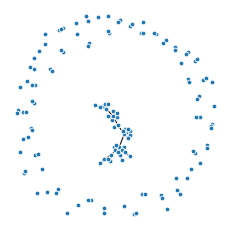

In [22]:
import numpy as np
import sklearn
import kmapper as km

#data = np.genfromtxt('data/cat-reference.csv', delimiter=',')

mapper = km.KeplerMapper(verbose=2)
wv = model.wv
lens = mapper.fit_transform(wv.vectors[:10000])

graph = mapper.map(lens,
                   wv.vectors[:10000],
                   clusterer=sklearn.cluster.DBSCAN(eps=5.11, min_samples=2),
                   cover=km.Cover(n_cubes=26, perc_overlap=0.5))

mapper.visualize(graph,
                 path_html="gensim_w2vmapper_oro.html",
                 custom_tooltips=tooltip_s)


km.draw_matplotlib(graph)